In [1]:
from metrics.evaluation import cross_validate_stratify, present_metrics, get_metrics
from metrics.learning_curve import plot_learning_curve
from visualizer.barchart import plot_bar_chart_comparison, plot_bar_chart
from sklearn import preprocessing
from sklearn.cross_validation import StratifiedShuffleSplit, StratifiedKFold
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

None


/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


using it all together

In [2]:
label = pd.read_csv("data/dataset.csv")
labely = label.iloc[:, 13].values
sss = StratifiedShuffleSplit(labely, n_iter=1, test_size=0.3, random_state=0)

for train_index, test_index in sss:
    train_indices= train_index
    test_indices = test_index
skf = StratifiedKFold(labely[train_indices], n_folds=10)

X_set = []
y_set = []

# DATA SET INDIVIDUAL

In [3]:
# USING RBF KERNEL
df = pd.read_csv("data/datasetindividual.csv")

X = np.matrix(df.iloc[:, range(0, 45)].values)
y = df.iloc[:, 45].values

X_set.append(X)
y_set.append(y)

svm = SVC(class_weight='balanced')

resulti_all_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_all_rbf = resulti_all_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_all_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_all_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_all_rbf["matt_cross_val"])
print "GMEAN: " + str(resulti_all_rbf["gmean_cross_val"])
print ""
present_metrics(gmeani_all_rbf, "GMEAN")



CROSS VAL SCORES
SENSITIVITY: 1.0
SPECIFICITY: 0.973333333333
MATTHEWS CORR COEF: 0.943343700313
GMEAN: 0.986313290241

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 1.0
MATTHEWS CORR COEF: 1.0
GMEAN: 1.0


CONFUSION MATRIX
4	0
0	16

####### TEST GMEAN #######
SENSITIVITY: 0.857142857143
SPECIFICITY: 0.893939393939
MATTHEWS CORR COEF: 0.670628130896
GMEAN: 0.875347797298


CONFUSION MATRIX
12	2
7	59


# DATA SET INDIVIDUAL NO VORONOI TESSELLATION

In [4]:
# USING RBF KERNEL
df = pd.read_csv("data/datasetindividual.csv")

X = np.matrix(df.iloc[:, range(0, 40)].values)
y = df.iloc[:, 45].values

X_set.append(X)
y_set.append(y)

svm = SVC(class_weight='balanced')

resulti_novoronoi_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_novoronoi_rbf = resulti_novoronoi_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_novoronoi_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_novoronoi_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_novoronoi_rbf["matt_cross_val"])
print "GMEAN: " + str(resulti_novoronoi_rbf["gmean_cross_val"])
print ""
present_metrics(gmeani_novoronoi_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 1.0
SPECIFICITY: 0.98
MATTHEWS CORR COEF: 0.95967769766
GMEAN: 0.989704111933

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 1.0
MATTHEWS CORR COEF: 1.0
GMEAN: 1.0


CONFUSION MATRIX
4	0
0	16

####### TEST GMEAN #######
SENSITIVITY: 0.857142857143
SPECIFICITY: 0.909090909091
MATTHEWS CORR COEF: 0.697212516064
GMEAN: 0.882734829505


CONFUSION MATRIX
12	2
6	60


# DATA SET ALL MEAN

In [5]:
# USING RBF KERNEL
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 13)].values)
y = df.iloc[:, 13].values

X_set.append(X)
y_set.append(y)

svm = SVC(class_weight='balanced', C=0.5)

resultm_all_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_all_rbf = resultm_all_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_all_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_all_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_all_rbf["matt_cross_val"])
print "GMEAN: " + str(resultm_all_rbf["gmean_cross_val"])
print ""
present_metrics(gmeanm_all_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.941666666667
SPECIFICITY: 0.920833333333
MATTHEWS CORR COEF: 0.799009418465
GMEAN: 0.929386141386

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 1.0
MATTHEWS CORR COEF: 1.0
GMEAN: 1.0


CONFUSION MATRIX
4	0
0	16

####### TEST GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 0.863636363636
MATTHEWS CORR COEF: 0.725045998268
GMEAN: 0.929320377285


CONFUSION MATRIX
14	0
9	57


# DATA SET ALL MEAN NO VORONOI

In [6]:
# USING RBF KERNEL
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 8)].values)
y = df.iloc[:, 13].values

X_set.append(X)
y_set.append(y)

svm = SVC(class_weight='balanced')

resultm_novoronoi_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_novoronoi_rbf = resultm_novoronoi_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_novoronoi_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_novoronoi_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_novoronoi_rbf["matt_cross_val"])
print "GMEAN: " + str(resultm_novoronoi_rbf["gmean_cross_val"])
print ""
present_metrics(gmeanm_novoronoi_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.966666666667
SPECIFICITY: 0.888333333333
MATTHEWS CORR COEF: 0.775341030063
GMEAN: 0.922747373173

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 1.0
MATTHEWS CORR COEF: 1.0
GMEAN: 1.0


CONFUSION MATRIX
3	0
0	15

####### TEST GMEAN #######
SENSITIVITY: 0.857142857143
SPECIFICITY: 0.818181818182
MATTHEWS CORR COEF: 0.55994963993
GMEAN: 0.837435789359


CONFUSION MATRIX
12	2
12	54


# DATA SET ALL MEAN WITH FEATURE SELECTION

In [7]:
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 8)].values)
y = df.iloc[:, 13].values

svm = Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
                ('classification', SVC(class_weight='balanced'))])
        
result_FE = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

features = svm.named_steps['feature_selection'].get_support()

print "USED"
feat_i = [i for i, used in enumerate(features) if used]
unused_feat_i = [i for i, used in enumerate(features) if not used]
print [df.keys()[i] for i in feat_i]


# USE THIS TO EVALUATE
X_set.append(np.matrix(df.iloc[:, feat_i].values))
y_set.append(y)


print "UNUSED"
print [df.keys()[i] for i in unused_feat_i]
print ""

gmean_FE = result_FE["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(result_FE["sens_cross_val"])
print "SPECIFICITY: " + str(result_FE["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(result_FE["matt_cross_val"])
print "GMEAN: " + str(result_FE["gmean_cross_val"])
print ""
present_metrics(gmean_FE, "GMEAN")


USED
['distance', 'canonical distance', 'distance - canonical', 'entropy', 'time defending', 'distance from post', 'velocity defender', 'velocity offender']
UNUSED
[]

CROSS VAL SCORES
SENSITIVITY: 0.966666666667
SPECIFICITY: 0.888333333333
MATTHEWS CORR COEF: 0.775341030063
GMEAN: 0.922747373173

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 1.0
MATTHEWS CORR COEF: 1.0
GMEAN: 1.0


CONFUSION MATRIX
3	0
0	15

####### TEST GMEAN #######
SENSITIVITY: 0.857142857143
SPECIFICITY: 0.818181818182
MATTHEWS CORR COEF: 0.55994963993
GMEAN: 0.837435789359


CONFUSION MATRIX
12	2
12	54


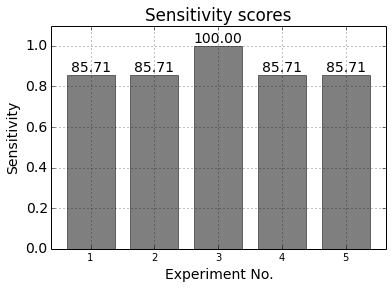

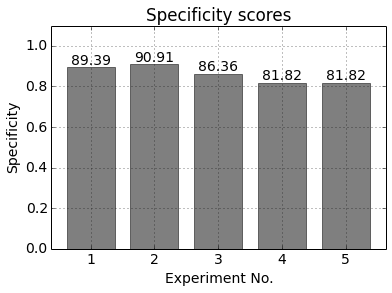

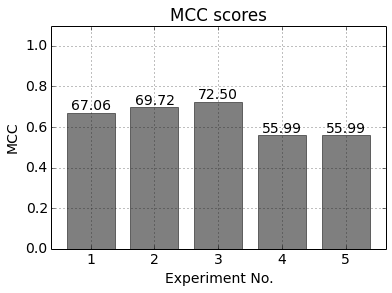

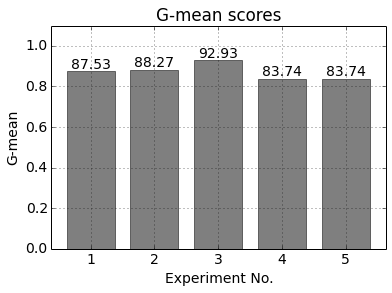

In [8]:
sensitivity_rbf = ([
gmeani_all_rbf[2][0],
gmeani_novoronoi_rbf[2][0],
gmeanm_all_rbf[2][0],
gmeanm_novoronoi_rbf[2][0],
gmean_FE[2][0]])

specificity_rbf =([
gmeani_all_rbf[2][1],
gmeani_novoronoi_rbf[2][1],
gmeanm_all_rbf[2][1],
gmeanm_novoronoi_rbf[2][1],
gmean_FE[2][1]
])

matthews_rbf = ([
gmeani_all_rbf[2][2],
gmeani_novoronoi_rbf[2][2],
gmeanm_all_rbf[2][2],
gmeanm_novoronoi_rbf[2][2],
gmean_FE[2][2]
])

gmean_rbf = ([
gmeani_all_rbf[2][3],
gmeani_novoronoi_rbf[2][3],
gmeanm_all_rbf[2][3],
gmeanm_novoronoi_rbf[2][3],
gmean_FE[2][3]
])

scores_rbf = [sensitivity_rbf, specificity_rbf, matthews_rbf, gmean_rbf]
labels = ["Sensitivity", "Specificity", "MCC", "G-mean"]

for score_rbf, label in zip(scores_rbf, labels):
    plot_bar_chart(label, ["1", "2", "3", "4", "5"], score_rbf)

In [9]:
# scorer(estimator, X, y)

# return 0 sensitivity, 1 specificity, 2 matthews, 3 gmean, 4 matrix
def scorer_gmean(clf, X, y):
    return get_metrics(clf, X, y)[3]

def scorer_mcc(clf, X, y):
    return get_metrics(clf, X, y)[2]

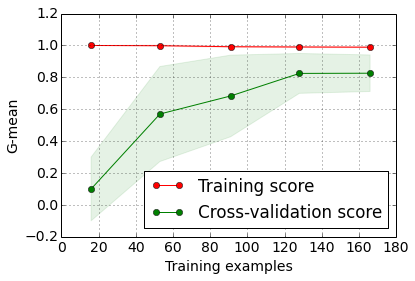

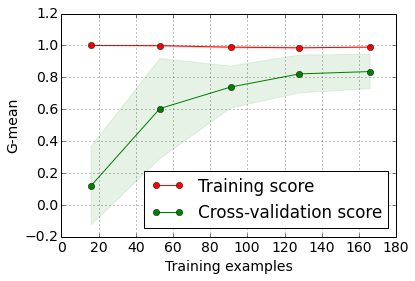

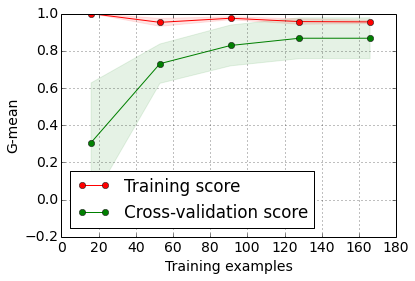

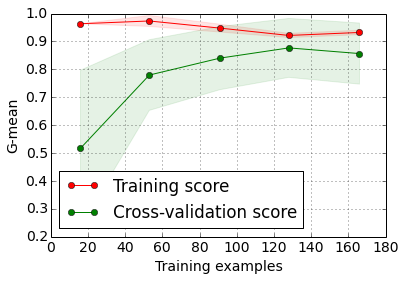

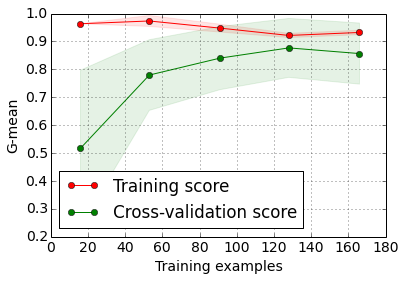

In [10]:
title = "Learning curve"

estimator = SVC(class_weight='balanced')
title = ["Experiment #" + str(i) for i in range(1, 6)]
sss1 = StratifiedShuffleSplit(labely, n_iter=1, test_size=0.3, random_state=0)
    
for i in range(5):
    # full_title = "Learning Curve for SVM RBF (" + title[i] + ")"
    full_title = ""
    plot_learning_curve(estimator, full_title, X_set[i][train_indices], y_set[i][train_indices],
                        cv=skf, scoring=scorer_gmean, ylabel="G-mean")

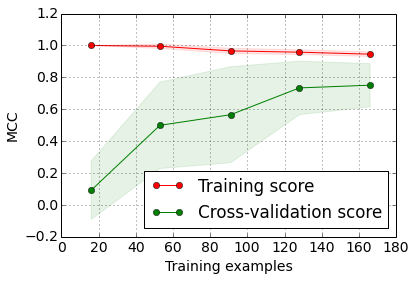

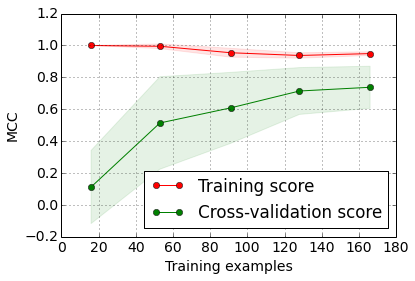

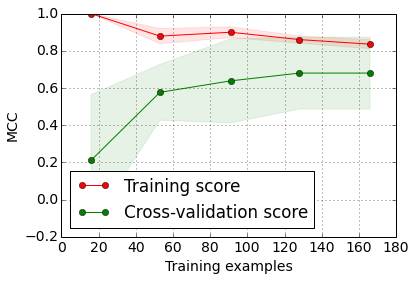

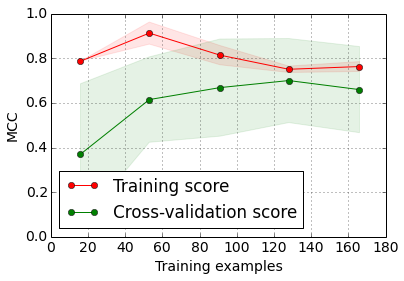

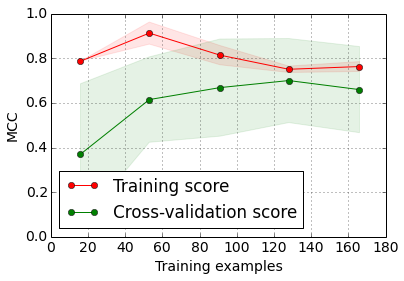

In [11]:
title = "Learning curve"

estimator = SVC(class_weight='balanced')
title = ["Experiment #" + str(i) for i in range(1, 6)]
sss1 = StratifiedShuffleSplit(labely, n_iter=1, test_size=0.3, random_state=0)
    
for i in range(5):
    # full_title = "Learning Curve for SVM RBF (" + title[i] + ")"
    full_title = ""
    plot_learning_curve(estimator, full_title, X_set[i][train_indices], y_set[i][train_indices],
                        cv=skf, scoring=scorer_mcc, ylabel="MCC")